In [1]:
from pandas_profiling import ProfileReport

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv(r'C:\Users\Chetan Shetty\Desktop\Trial_Project\titanic.csv')

In [4]:
len(dataset)

891

In [6]:
profile=ProfileReport(dataset,title="Titanic Report")

In [7]:
profile.to_file("Titanic Report.html")

## As per report there are 107 (12.0%) duplicate rows

### Remove duplicate rows

In [5]:
dataset.drop_duplicates(subset=None, keep='first',inplace=True)

In [6]:
dataset.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## Remove highly corelated Classes

In [7]:
dataset.drop(['class','who','embark_town','embarked'],axis=1,inplace=True)

## Remove attributes with lot of missing values and Zeros

In [8]:
dataset.drop(['deck','sibsp','parch'],axis=1,inplace=True)

## fare has 15 (1.7%) zeros

In [9]:
dataset['fare'].replace(to_replace =0,value =np.nan,inplace=True) 

### Will use median here as min is only 4 and max is 512 and with the standard deviation of 52 there is some skewness

In [10]:
dataset.describe()

,survived,pclass,age,fare
count,784.000000,784.000000,678.000000,774.000000
mean,0.411990,2.243622,29.869351,35.160212
std,0.492507,0.855056,14.759076,52.345859
min,0.000000,1.000000,0.420000,4.012500
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,3.000000,28.250000,16.100000
75%,1.000000,3.000000,39.000000,34.375000
max,1.000000,3.000000,80.000000,512.329200


In [11]:
dataset['fare'].fillna(value=dataset['fare'].median(),inplace=True)

## age has 177 (19.9%) missing values

### As the mean and median of age is almost same its normally distributed hence i will replace NaN with mean

In [12]:
dataset.fillna(value=dataset['age'].mean(),inplace=True)

## Check for any missing values

In [13]:
dataset.isna().sum()

survived      0
pclass        0
sex           0
age           0
fare          0
adult_male    0
alive         0
alone         0
dtype: int64

In [14]:
dataset.head(3)

,survived,pclass,sex,age,fare,adult_male,alive,alone
0,0,3,male,22.0,7.2500,True,no,False
1,1,1,female,38.0,71.2833,False,yes,False
2,1,3,female,26.0,7.9250,False,yes,True


In [15]:
dataset['adult_male']=dataset['adult_male'].astype(int)
dataset['alone']=dataset['alone'].astype(int)

In [16]:
dataset=pd.get_dummies(dataset)

In [17]:
dataset.head(3)

,survived,pclass,age,fare,adult_male,alone,sex_female,sex_male,alive_no,alive_yes
0,0,3,22.0,7.2500,1,0,0,1,1,0
1,1,1,38.0,71.2833,0,0,1,0,0,1
2,1,3,26.0,7.9250,0,1,1,0,0,1


In [18]:
import matplotlib.pyplot as plt

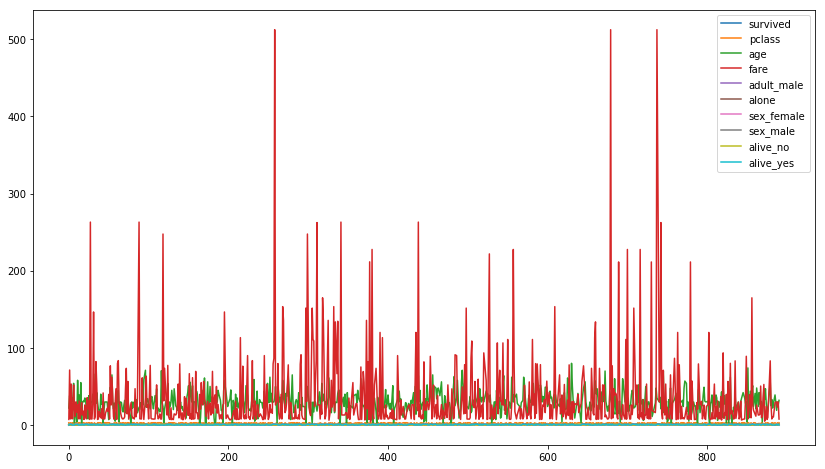

In [19]:
plt.figure(figsize=(14,8))
plt.plot(dataset);
plt.legend(dataset)

In [20]:
#np.where(dataset['fare']>400)

In [21]:
#dataset.loc[[243,600,652],'fare']

In [22]:
dataset['survived'].value_counts()

0    461
1    323
Name: survived, dtype: int64

In [23]:
print(f'class 0(Didnt survive:{100*(461/float(dataset.shape[0]))} % \n Class 1(Survived):{100*(323/float(dataset.shape[0]))} %')

class 0(Didnt survive:58.80102040816326 % 
 Class 1(Survived):41.19897959183674 %


## There is a class imbalance. Handle the imbalance

In [24]:
dataset.shape

(784, 10)

In [25]:
dataset.head()

,survived,pclass,age,fare,adult_male,alone,sex_female,sex_male,alive_no,alive_yes
0,0,3,22.0,7.2500,1,0,0,1,1,0
1,1,1,38.0,71.2833,0,0,1,0,0,1
2,1,3,26.0,7.9250,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,1
4,0,3,35.0,8.0500,1,1,0,1,1,0


In [26]:
X=dataset.iloc[:,1:]
y=dataset['survived']

### Use SMOTE technique

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [29]:
y.value_counts()

1    461
0    461
Name: survived, dtype: int64

## Build the Model

### Perform train and test split

In [51]:
X=X.values
y=y.values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set result

In [54]:
y_pred = classifier.predict(X_test)

## Evaluate the model

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print("Accuracy Score=",accuracy_score(y_test,y_pred))
print("\n",cr)

[[79 22]
 [30 54]]
Accuracy Score= 0.7189189189189189

               precision    recall  f1-score   support

           0       0.72      0.78      0.75       101
           1       0.71      0.64      0.67        84

    accuracy                           0.72       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.72      0.72      0.72       185



## Hyperparameter tuning for SVM

In [56]:
from sklearn.model_selection import GridSearchCV 

In [57]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [58]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [59]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.541, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.534, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.626, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.973, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.966, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.959, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.932, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.959, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.973, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.932, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

## Print best parameters after tuning 

In [60]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [61]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.0001)


In [62]:
grid_predictions = grid.predict(X_test)

In [63]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        84

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [64]:
print(confusion_matrix(y_test, grid_predictions)) 

[[101   0]
 [  0  84]]


In [65]:
print("Accuracy Score=",accuracy_score(y_test,grid_predictions))

Accuracy Score= 1.0


## Save the Model

In [66]:
import joblib

In [67]:
joblib.dump(grid, 'titanic.pkl')

['titanic.pkl']